# Excerise - Logistic Regression and Classification Measures
In this exercise you will explore how hard it is to find the best balance between TPR and FPR. 

Next, you will implement a logistic regression classifier using gradient decent.

We will then turn to applying multi-class classifiers over the well known MNIST digits database, and analyse the results using a confusion matrix.

## Balancing TPR and FPR and interpretability of a classifier results given inbalance between classes
After your yearly checkup, the doctor has bad news and good news. The bad news is that you tested positive for a serious disease, and that the test is 99% accurate (i.e. the probability of testing positive given that you have the disease is 0.99, as is the probability of testing negative given that you don’t have the disease). The good news is that this is a rare disease, striking only 1 in 10,000 people. 

1. What is the accuracy of always predicting a patient is healthy? Would that be a good strategy?

2. What are the TPR and FPR of the chosen classifier in this case? Giving that there is a tradeoff between the two --- is it a good point on the ROC curve?

3. Why is it good news that the disease is rare? What are the chances that you actually have the disease?

4. Taking into account the previous answers, would you say the designer of the classifier made a good choice in this case?



#### Answer 1
The accuracy of always predicting a patient is healthy is .9999, which on a regular metric is fanastic. But being that if we incorrectly predict someone they could die - it is a horrible stratergy!

#### Answer 2
TPR = TP / (TP + FN) = <br>(P(Sick) * P(Test-Positive | Sick)) / (P(Sick) * P(Test-Positive | Sick) + P(Sick) * P(Test-Negative | Sick)  =<br> .000099 / (.000099 + .000001) = **.99**
<br><br>
FPR = FP / (FP + TN) = <br>(P(Not_Sick) * P(Test-Positive | Not_Sick)) / (P(Not_Sick) * P(Test-Positive | Not_Sick) + P(Not_Sick) * P(Test-Negative | Not_Sick)  =<br> .009999 / (.009999 + .989901) = **.01**

***Giving that there is a tradeoff between the two --- is it a good point on the ROC curve?***
<br>Given the seriousness of the disease, a FPR of .01 is still very bad!

#### Answer 3
P(Sick | Test_Positive) = (P(Sick) * P(Test_Positive|Sick)) / (P(Sick) * P(Test_Positive|Sick) + P(Not_Sick) * P(Test_Positive|Not_Sick)) = 
<br> .000099 / (.000099 + .009999) = **.0098**

As we can see, because the disease is rare, even though you tested positive, it's still more likely that it was a misreading!

#### Answer 4
It really depends on what one does with the classifier. If the person was sick, we would amputate a limb, it is good that we dont just judge it base off of the test, because as we saw, its still unlikely that the person is sick. However, if getting a positive test result we would run extra tests to make sure said person actually is sick - then no, the classifier is horrible, because we still want to know when someone might be sick!

## Implementing Logistic Regression Model
Recall the loss function of the binary (Univariate) Logistic Regression model

$$ J(\beta)=-\frac{1}{m}\sum_{i=1}^{m}\left(y^{(i)}\log(h_\beta(x^{(i)}))+(1-y^{(i)})\log(1-h_\beta(x^{(i)}))\right) $$

and the gradient decent update rule is given by

$$ \beta_j^t := \beta_j^{t-1}-\mu\frac{\partial}{\partial \beta_j}J(\beta)
$$

1. Write the explicit (and rather simple) update rule for a gradient decent solver of the Logistic Regression model.
2. Implement a LogisticRegression class with `fit`, `predict`, and `score` functions, and the constructor of the class should have the following parameters (feel free to add methods and parameters as you see fit):
  * `method`: either `GD` or `SGD`, indiacting whether to use a regular gradient decent, or an [iterative stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Iterative_method) respectively.
  * `learning_rate`: the learning rate to be used
  * `num_iterations`: number of iterations for the gradient decent algorithms (**note** that for stochastic gradient decent, each iteration is interpreted in that aspect as an epoch of going over all the samples, as it is computationaly similar to a single iteration of regular gradient decent)
  * `track_loss`: a boolean stating if to track the loss of the model for each iteration during training; if `True` the model will have a `loss` vector with the loss that was claculated for each of the iterations.
3. Use the provided code to load the Iris dataset as a toy example, on which we will compare the results of the two logistic regression solvers. Run both solvers (GD and SGD) for 1000 iterations, using a learning rate of 0.1, and compare the learning curve by plotting the loss during training. Describe the results, and plot the decision boundary for each of the models. What would you see if you plot the loss after each parameters update (for each sample in every epoch)?
 
 
For simplicity, do not use regularization, and we will not try to find the best learning rate --- however, you are more than welcome to play with those on your own.


#### Answer 1
w = w - alpha*(1/m)*X*(a-y) where a = sigma(z), where z = w.T * X

#### Answer 2

In [543]:
ynew = y.reshape(1,-1)
ynew[0,7]

0

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt

In [17]:
def scalingfeatures(X):
    scaler = StandardScaler()
    scaler.fit(X)
    return scaler.transform(X)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegression():
    
    def __init__(self, method = "GD", lr = 0.1, num_iter = 1000, track_loss = True, count_every_loss = False):
        self.method = method
        self.lr = lr
        self.num_iter = num_iter
        self.track_loss = track_loss
        self.count_every_loss = count_every_loss
    
    def fit(self,X,y):
        #Unlike my previous homework, I can going to assume that scaling was already done before calling the function.
        #padding
        XX = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
        np.random.seed(42)
        if self.track_loss:
            loss = list()
        #initialize weights
        weights = np.random.rand(XX.shape[1],1)
        m = XX.shape[0]
        if self.method == "GD":
            XX, y = XX.T, y.reshape(1,-1)  
            #Unlike my previous homework, where I preformed GD via pytorch, I will implement it here with simple vector multiplication
            for i in range(self.num_iter):
                z = np.dot(weights.T,XX)
                #sigmoid function
                a = 1/(1 + np.exp(-z))
                if self.track_loss:
                    J = -1/m * np.sum(y * np.log(a)  + (1 - y)*np.log(1 - a))                    
                    loss.append(np.squeeze(J))
                dz = a-y
                dw = (1 / m) * np.dot(XX, dz.T)
                weights -= self.lr * dw
                
        elif self.method == "SGD":
            y = y.reshape(1,-1)
            np.random.seed(42)
            for i in range(self.num_iter):
                J = 0
                order = np.random.choice(m, size=m, replace=False)
                for idx in order:
                    dw = 0
                    X_row = XX[idx,:].T.reshape(-1,1)
                    y_row = y[0,idx].reshape(1,1)
                    z = np.dot(weights.T,X_row)
                    a = 1/(1 + np.exp(-z))
                    #due to proximation errors, we were getting a == 1 or 0, which is an issues because log(0) is undefined
                    if a == 1:
                        a -= 1e-15
                    elif a == 0:
                        a += 1e-15
                    if self.track_loss: 
                        new_loss = -1 * (y_row * np.log(a)  + (1 - y_row)*np.log(1 - a))
                        if self.count_every_loss:
                            loss.append(new_loss)
                        J += new_loss
                    dz = a - y_row
                    dw += np.dot(X_row.reshape(-1,1),dz.T.reshape(-1,1))
                    weights -= self.lr * dw
                if self.track_loss and not self.count_every_loss:
                        loss.append(np.squeeze(J))                   
        else:
            raise ValueError("Method \"{}\" is not known by our Algorithm".format(self.method))
            
        self.loss = loss
        self.w = weights
        
        return self
    
    def predict_prob(self,X):
        return sigmoid(np.concatenate((np.ones((X.shape[0],1)),X),axis=1)@self.w)
    
    def score(self,X,y):
        return np.power((self.predict(X) - y),2).mean()
    
    def predict(self, X, threshold=0.5):
        c1 = self.predict_prob(X)
        results = np.zero(X.shape[0])
        results[c1 > threshold] = 1
        return results

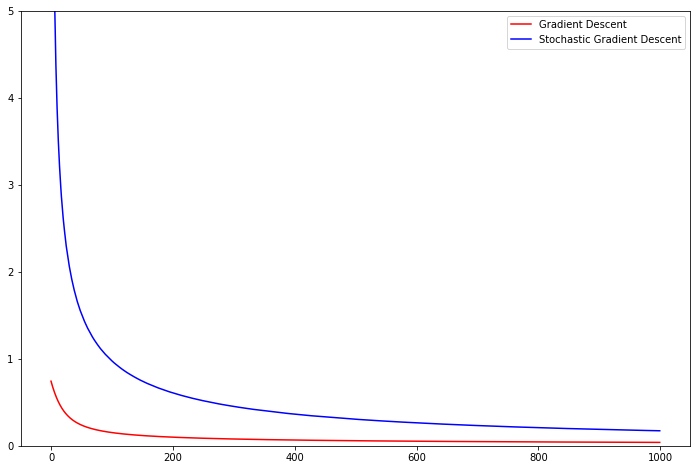

In [18]:
iris = datasets.load_iris()

#The issue with this data

X = iris.data[:100, :2]  # we only take the first two features.
y = iris.target[:100]

X = scalingfeatures(X)

plt.figure(figsize=(12,8))
train = LogisticRegression(method="GD").fit(X,y)
plt.plot(train.loss, c="red");
train2 = LogisticRegression(method="SGD").fit(X,y)
plt.plot(train2.loss, c="blue")
plt.legend(['Gradient Descent','Stochastic Gradient Descent'])
plt.ylim(0,5);

**Compare the learning curve by plotting the loss during training:**
Overlaying the plots one above the other shows me that the SGD Model converges to 0 much faster. This is a slightly unfair analysis, because in every iteration, SGD is running Gradient Descent `m` times, and therefore after ten iterations, has already run 1000 iterations. Even still, at 10 iterations, SGD is better than GD is at 1000 iterations.

#### Answer 3

Below is the code for loading the iris dataset and plotting the data with the models decision boundary.

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

(2500, 2)
(50, 50) (50, 50)


/Users/Adam/.pyenv/versions/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'label'
  
/Users/Adam/.pyenv/versions/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'label'


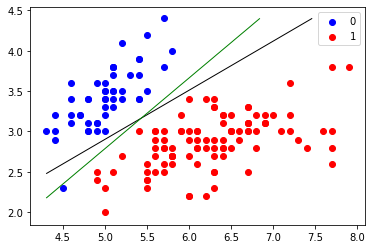

In [20]:
import matplotlib.pyplot as plt
def plot_samples(X, y, gd_model=None, sgd_model=None):
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
  
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    if gd_model is not None:
        probs = gd_model.predict_prob(grid).reshape(xx1.shape)
        plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black', label='GD')
    if sgd_model is not None:
        probs = sgd_model.predict_prob(grid).reshape(xx1.shape)
        plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='green', label='SGD')
    plt.legend();

train = LogisticRegression(method="GD").fit(X,y)
train2 = LogisticRegression(method="SGD").fit(X,y)
plot_samples(X,y,train,train2)

Overall the Logistic Regression model works pretty well, there is one case where the model would mispredict a flower, but that might be due to the fact that all flowers of class 2 are being classified as being part of class 1...

**What would you see if you plot the loss after each parameters update (for each sample in every epoch?**

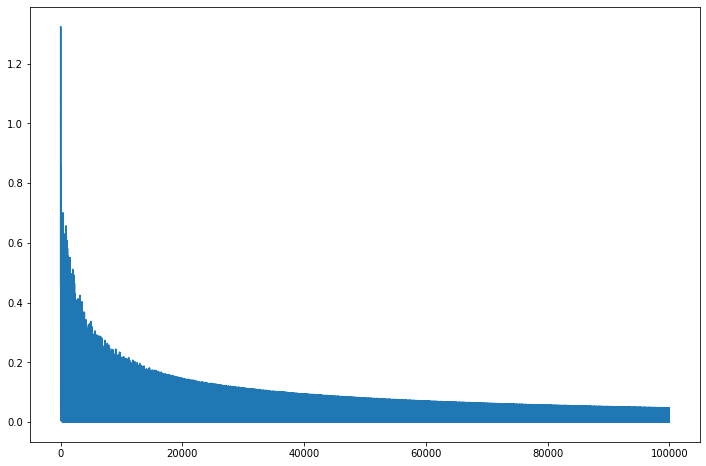

In [21]:
X = iris.data[:100, :2]  # we only take the first two features.
y = iris.target[:100]

X = scalingfeatures(X)

plt.figure(figsize=(12,8))
train2 = LogisticRegression(method="SGD", count_every_loss=True).fit(X,y)
plt.plot(np.array(train2.loss).reshape(-1,1));

***Although it is hard to see, the loss is fluctuating between small and large values, while continously improving.***
That is until it somewhat converges...not in the sense that the loss is the same for every X value, but that the maximum loss (furthest distance for a given X from the linear line) is consistent because our model as a whole is converging.

## Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Multivariate Logistic Regression (a discriminative model). 

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
>```mnist = sklearn.datasets.fetch_mldata('MNIST original')```

to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.


In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [23]:
# your code
mnist_data, mnist_labels = datasets.fetch_openml('mnist_784',return_X_y=True)

/Users/Adam/.ve/yandex/lib/python3.7/site-packages/sklearn/datasets/_openml.py:55: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


'5'

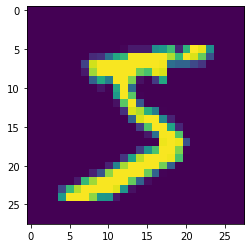

In [24]:
plt.imshow(mnist_data[0].reshape(28,28))
mnist_labels[0]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_labels, test_size=10000, random_state=42)

### Multivariate Logistic Regression
We will now apply the Multivariate Logistic Regression model discriminative model for this problem. We will use a prepared implementation of the model, so you won't need to implement it.

In this part we will keep the pixel values in grayscale, and assume the probability of each image being classified as one of the 10 digit classes, matches some multivariate logistic function.

#### Question 1
Run a Multivariate Logitic Regression classifier on the training data and apply predictions on the test data. Use the [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) implementation, and set the `solver` to be `'lbfgs'`, and  `multi_class` to `'multinomial'` (leave all other parameters in their default value).

1. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

2. Show some test images which were missclassified (classified incorrectly). Choose one such sample, and output the probability estimates for all classes (use the `predict_proba` function). Describe the results.

Note that here we cannot "generate" examples from the model.

In [27]:
from sklearn.linear_model import LogisticRegression as skLR
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

/Users/Adam/.ve/yandex/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The accuracy of our confusion matrix is:  0.9189


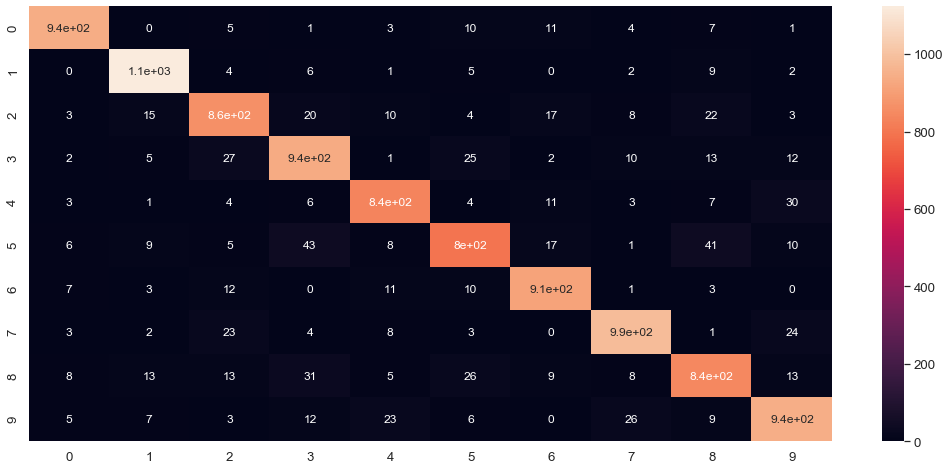

In [28]:
LR = skLR(solver='lbfgs',multi_class='multinomial').fit(X_train,y_train)
y_hat = LR.predict(X_test)

cfm = np.array(confusion_matrix(y_test,y_hat))
df_cm = pd.DataFrame(cfm, range(10),
                  range(10))
plt.figure(figsize = (18,8))
sn.set(font_scale=1.2)#for label size
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 12})
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5);

#To calculate accuracy:
diagonal_sum = cfm.trace()
sum_of_all_elements = cfm.sum()
print("The accuracy of our confusion matrix is: ", diagonal_sum / sum_of_all_elements) 

As we can see with the confusion matrix heatmap, and confirmed with the accuracy, our model has 92% Accuracy, to see the significance of the accuracy, we need to see how biased our original data is:

In [29]:
np.bincount(y_test.tolist())

array([ 983, 1152,  967, 1034,  906,  937,  961, 1055,  969, 1036])

The data is quite fairly spread out, which shows us that the model is actual doing a pretty good job of classifying digits, we also see some form of proportionality, where the model makes the same error in both directions, as in it predicts 5 as 3 - 43 times, and predicts 3 as 5 - 26 times.
The best way to understand how good the model is though, is to see a few of the mistakes and understand if the model is flawed of the examples themselves easily lend themselves to be misunderstood.

In [30]:
mistake_3 = np.where((y_hat == '3') & (y_test == '5'))[0][0]
mistake_7 = np.where((y_hat == '7') & (y_test == '9'))[0][0]
mistake_8 = np.where((y_hat == '8') & (y_test == '5'))[0][0]

Actual label:  5
Predicted label:  3


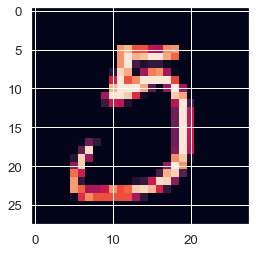

In [31]:
plt.imshow(X_test[mistake_3].reshape(28,28))
print("Actual label: ", y_test[mistake_3])
print("Predicted label: ", y_hat[mistake_3])

Actual label:  9
Predicted label:  7


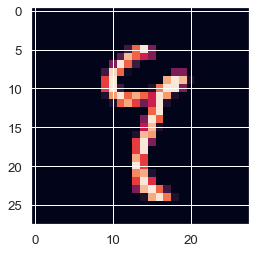

In [32]:
plt.imshow(X_test[mistake_7].reshape(28,28))
print("Actual label: ", y_test[mistake_7])
print("Predicted label: ", y_hat[mistake_7])

Actual label:  5
Predicted label:  8


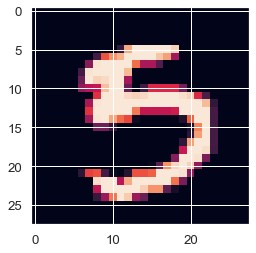

In [33]:
plt.imshow(X_test[mistake_8].reshape(28,28))
print("Actual label: ", y_test[mistake_8])
print("Predicted label: ", y_hat[mistake_8])

#### Answer 1
For the first two of those examples, it is easy to understand that even a solid model would have a hard time correctly classifying those digits.
Therefore, even though Accuracy is not the best metric to define a model - it would decently here!

In [34]:
LR.predict_proba(X_test[mistake_8].reshape(1,-1))

array([[1.36232134e-03, 7.41307686e-09, 6.10189352e-07, 1.30789374e-02,
        4.38208771e-04, 1.04738487e-01, 8.44436512e-07, 4.73396625e-05,
        8.43746320e-01, 3.65869242e-02]])

**Describe the results.**

The likelihood of it being '8' is 0.8, the likelihood of it being '5' is 0.1, and the rest are more or less irrelevant.

Which means that it wasn't completely off in the sense that it was "struggling" between 8 and 5, and it could be that the lower half of the number's large curvature maybe the model believe it was 8. However, due to many other obvious signs, such as the obvious empty spaces not found within 8's, perhaps with more training examples, ones where 5 is shown with a larger bottom half, the model will learn to correctly classify such cases!

#### Question 2
Comparing two methods for solving multiclass classification problems: one-vs-rest (OvR), and multinomial.

1. Discuss the results, and explain the plots in [Plot multinomial and One-vs-Rest Logistic Regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html).

2. Create another Logistic Regression classifier, setting now `multi_class` to `'ovr'` (instead of `multinomial`). Leave all other parameters the same. Compare the accuracy of this model with the previous one model. 




#### Answer 2
The fundamental logic behind Multinomial Logistic Regression is that our loss function is taking into account every possible class, and as such what we end up with, instead of a single 'a' = the likelihood our X_i is equal to class 1, but rather a vector of the possibilites that X_i belongs to each class k. In the plot, we see the boundary lines as for each class seperately, where with a high confidence can we assume that points of that class may lie. As we see, the lines cross over into other classes boundaries, but it isn't relevant because we are calculating each class seperately.

The fundamental logic behind One-vs-Rest, is that for k classes, we create a separate logistic regression model where its k_i vs all the other classes combined. We end up choosing the kth class whose model preforms the best.
In the plot we see the decision boundary plots where we would divide between class i and all the other classes.

In [35]:
LR = skLR(solver='lbfgs',multi_class='ovr').fit(X_train,y_train)
y_pred = LR.predict(X_test)

cfm = np.array(confusion_matrix(y_test,y_pred))
#To calculate accuracy:
diagonal_sum = cfm.trace()
sum_of_all_elements = cfm.sum()
print("The accuracy of our confusion matrix is: ", diagonal_sum / sum_of_all_elements) 

/Users/Adam/.ve/yandex/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Adam/.ve/yandex/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

The accuracy of our confusion matrix is:  0.9143


/Users/Adam/.ve/yandex/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


One-vs-rest did slightly worse with .91 instead of .92